   Gender   Age Height Weight family_history_with_overweight FAVC FCVC  NCP  \
0  Female  21.0   1.62   64.0                            yes   no  2.0  3.0   
1  Female  21.0   1.52   56.0                            yes   no  3.0  3.0   
2    Male  23.0    1.8   77.0                            yes   no  2.0  3.0   
3    Male  27.0    1.8   87.0                             no   no  3.0  3.0   
4    Male  22.0   1.78   89.8                             no   no  2.0  1.0   

        CAEC SMOKE CH2O  SCC    FAF    TUE        CALC                 MTRANS  \
0  Sometimes    no  2.0   no    0.0    1.0         NO   Public_Transportation   
1  Sometimes   yes  3.0  yes   3.0    0.0    Sometimes  Public_Transportation   
2  Sometimes    no  2.0   no    2.0    1.0  Frequently  Public_Transportation   
3  Sometimes    no  2.0   no    2.0    0.0  Frequently                Walking   
4  Sometimes    no  2.0   no   0.0    0.0    Sometimes  Public_Transportation   

             NObeyesdad mixed_type_col

/var/folders/ly/v01w3m6954z09lghvcgjlfp80000gn/T/ipykernel_20117/2756626034.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", ax=axes[i])
/var/folders/ly/v01w3m6954z09lghvcgjlfp80000gn/T/ipykernel_20117/2756626034.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", ax=axes[i])
/var/folders/ly/v01w3m6954z09lghvcgjlfp80000gn/T/ipykernel_20117/2756626034.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", ax=axes[i])
/var/folders/ly/v01w3m

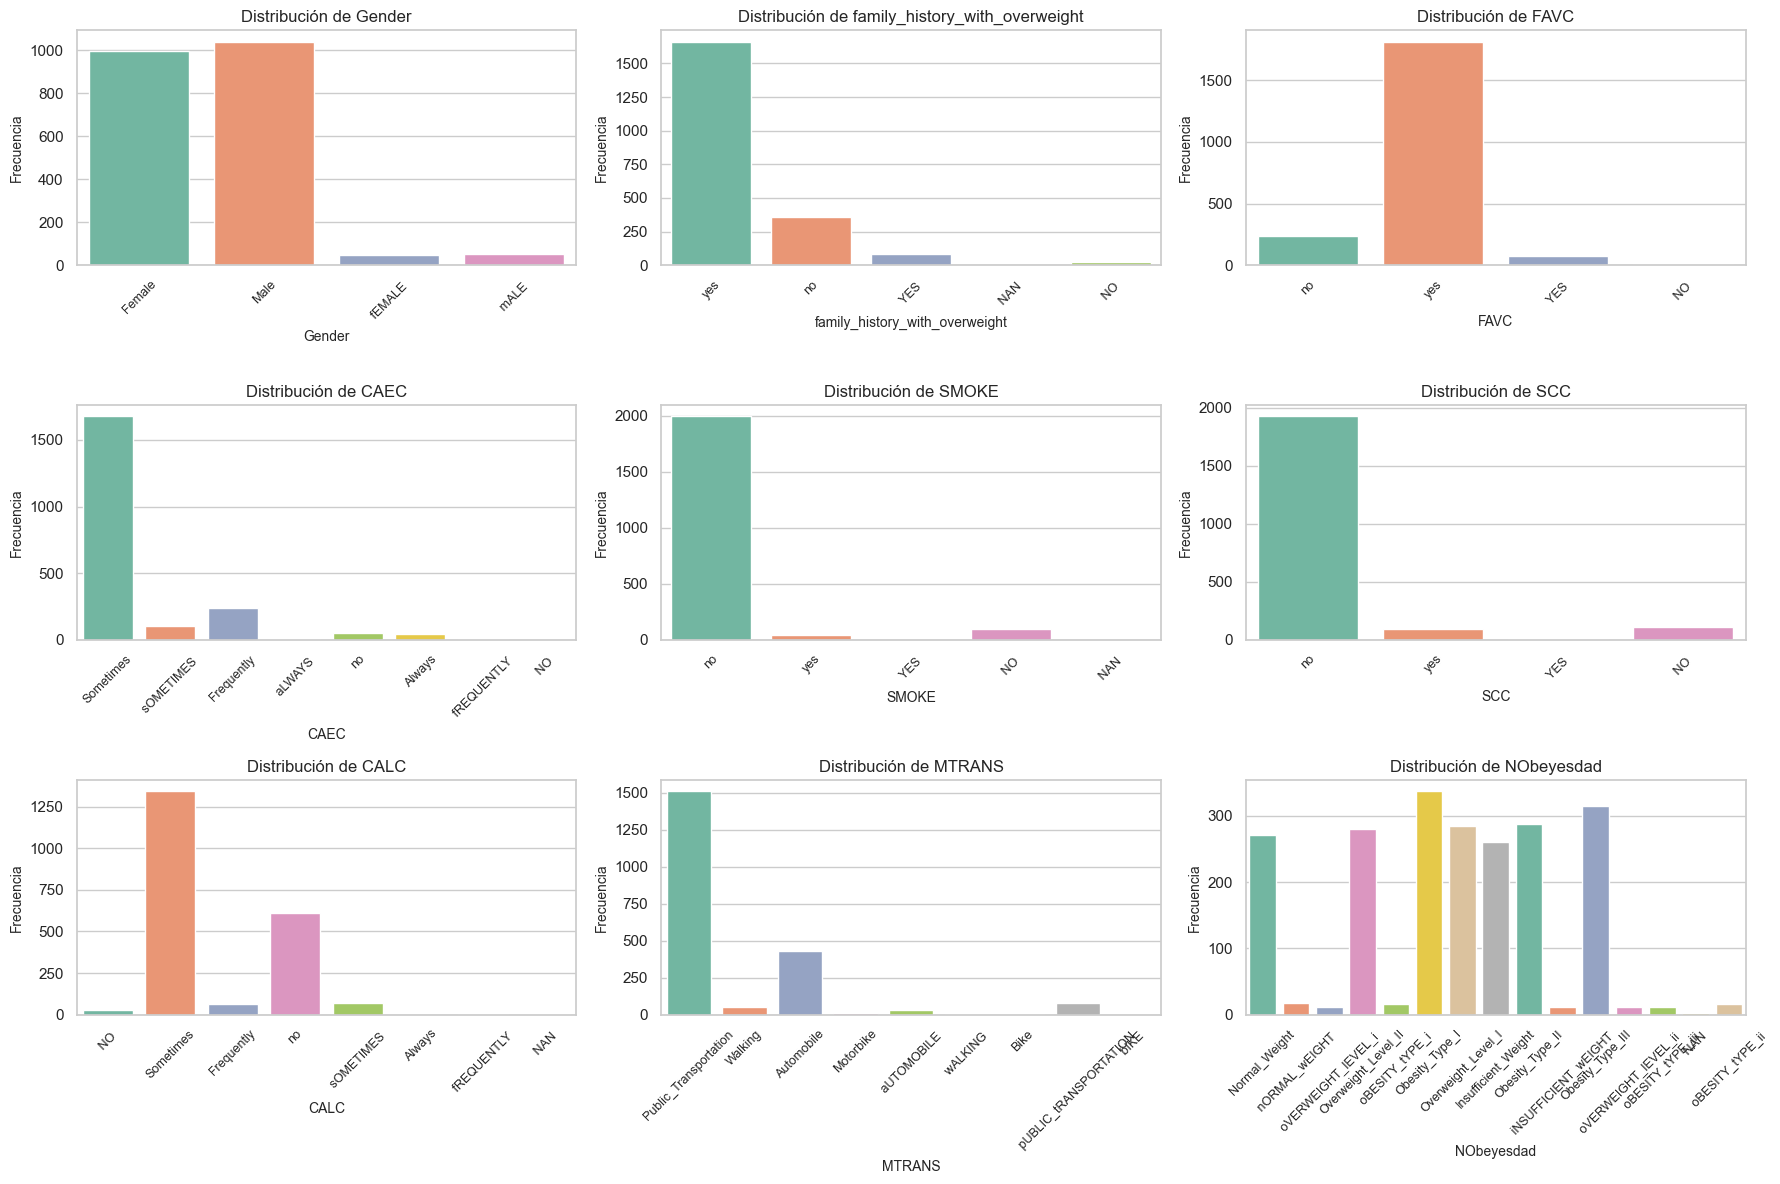

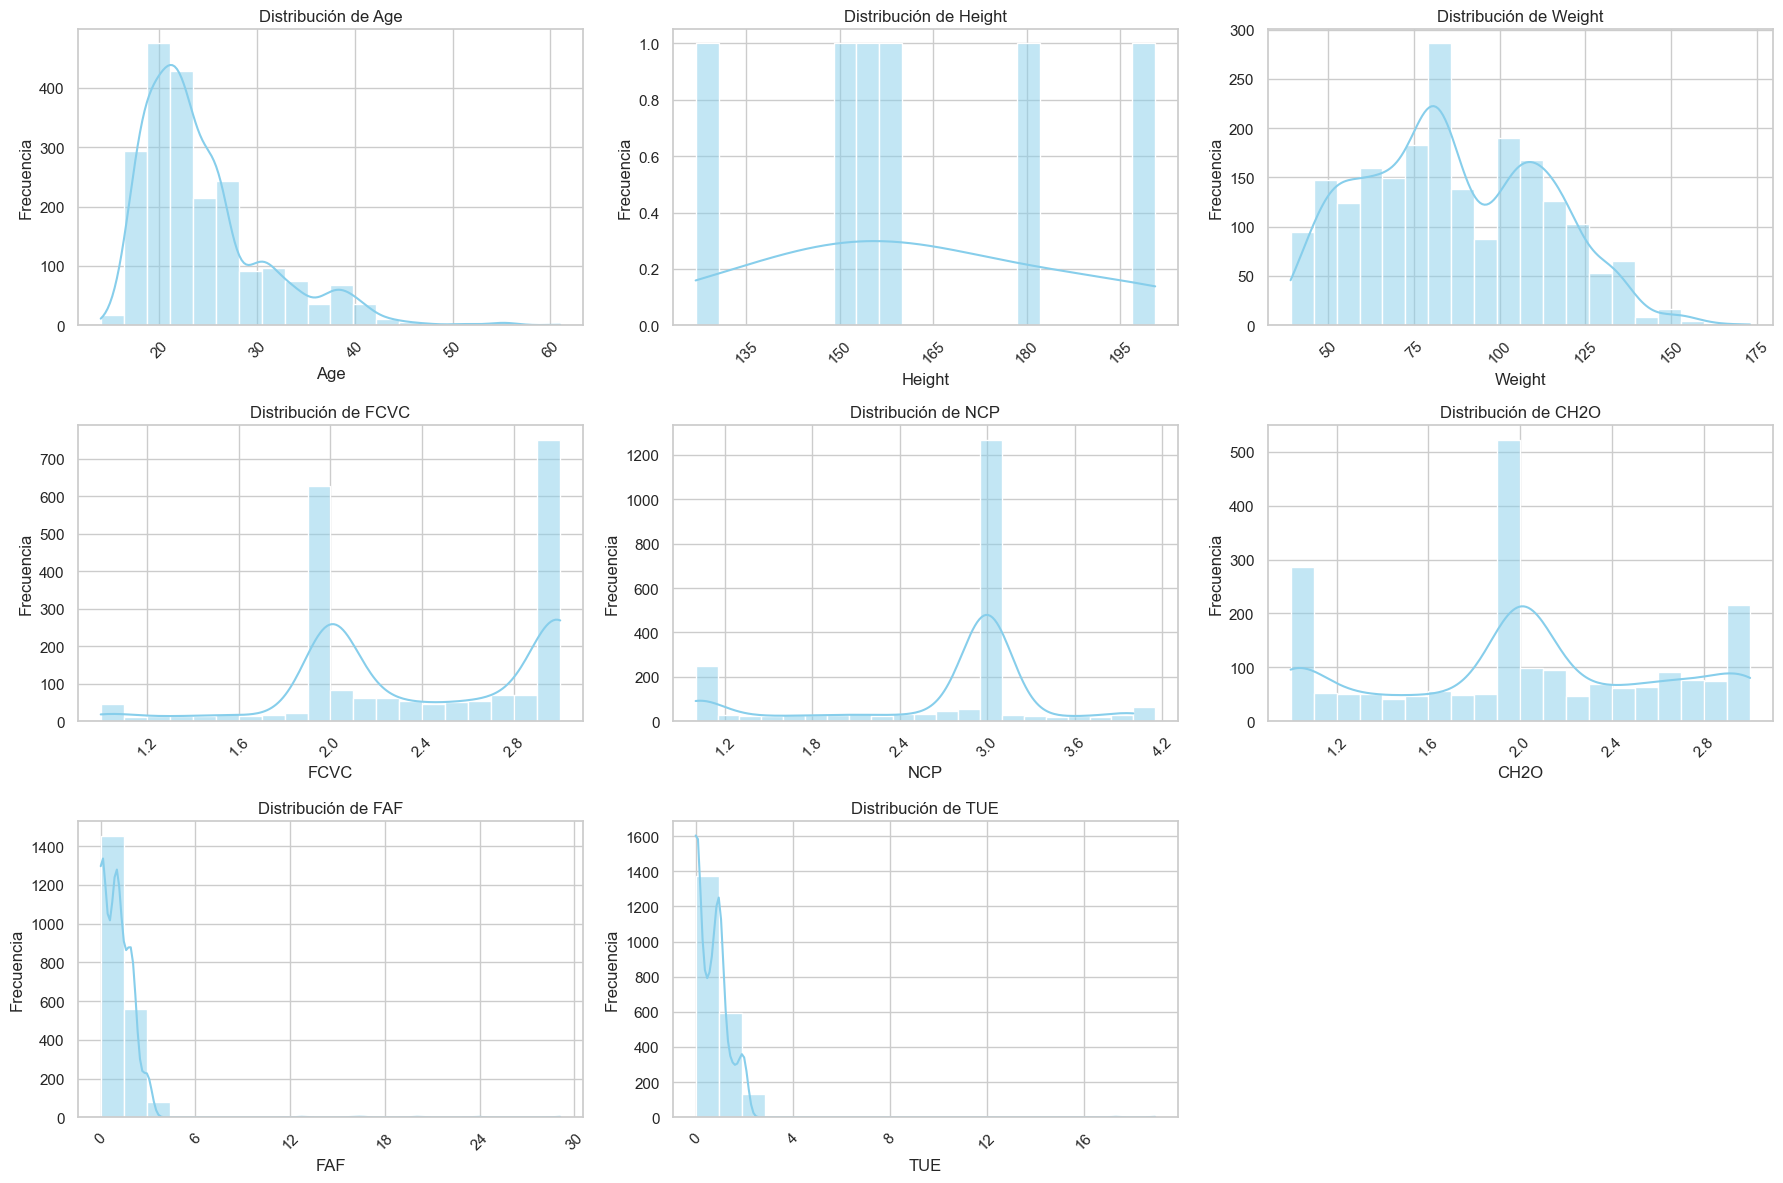

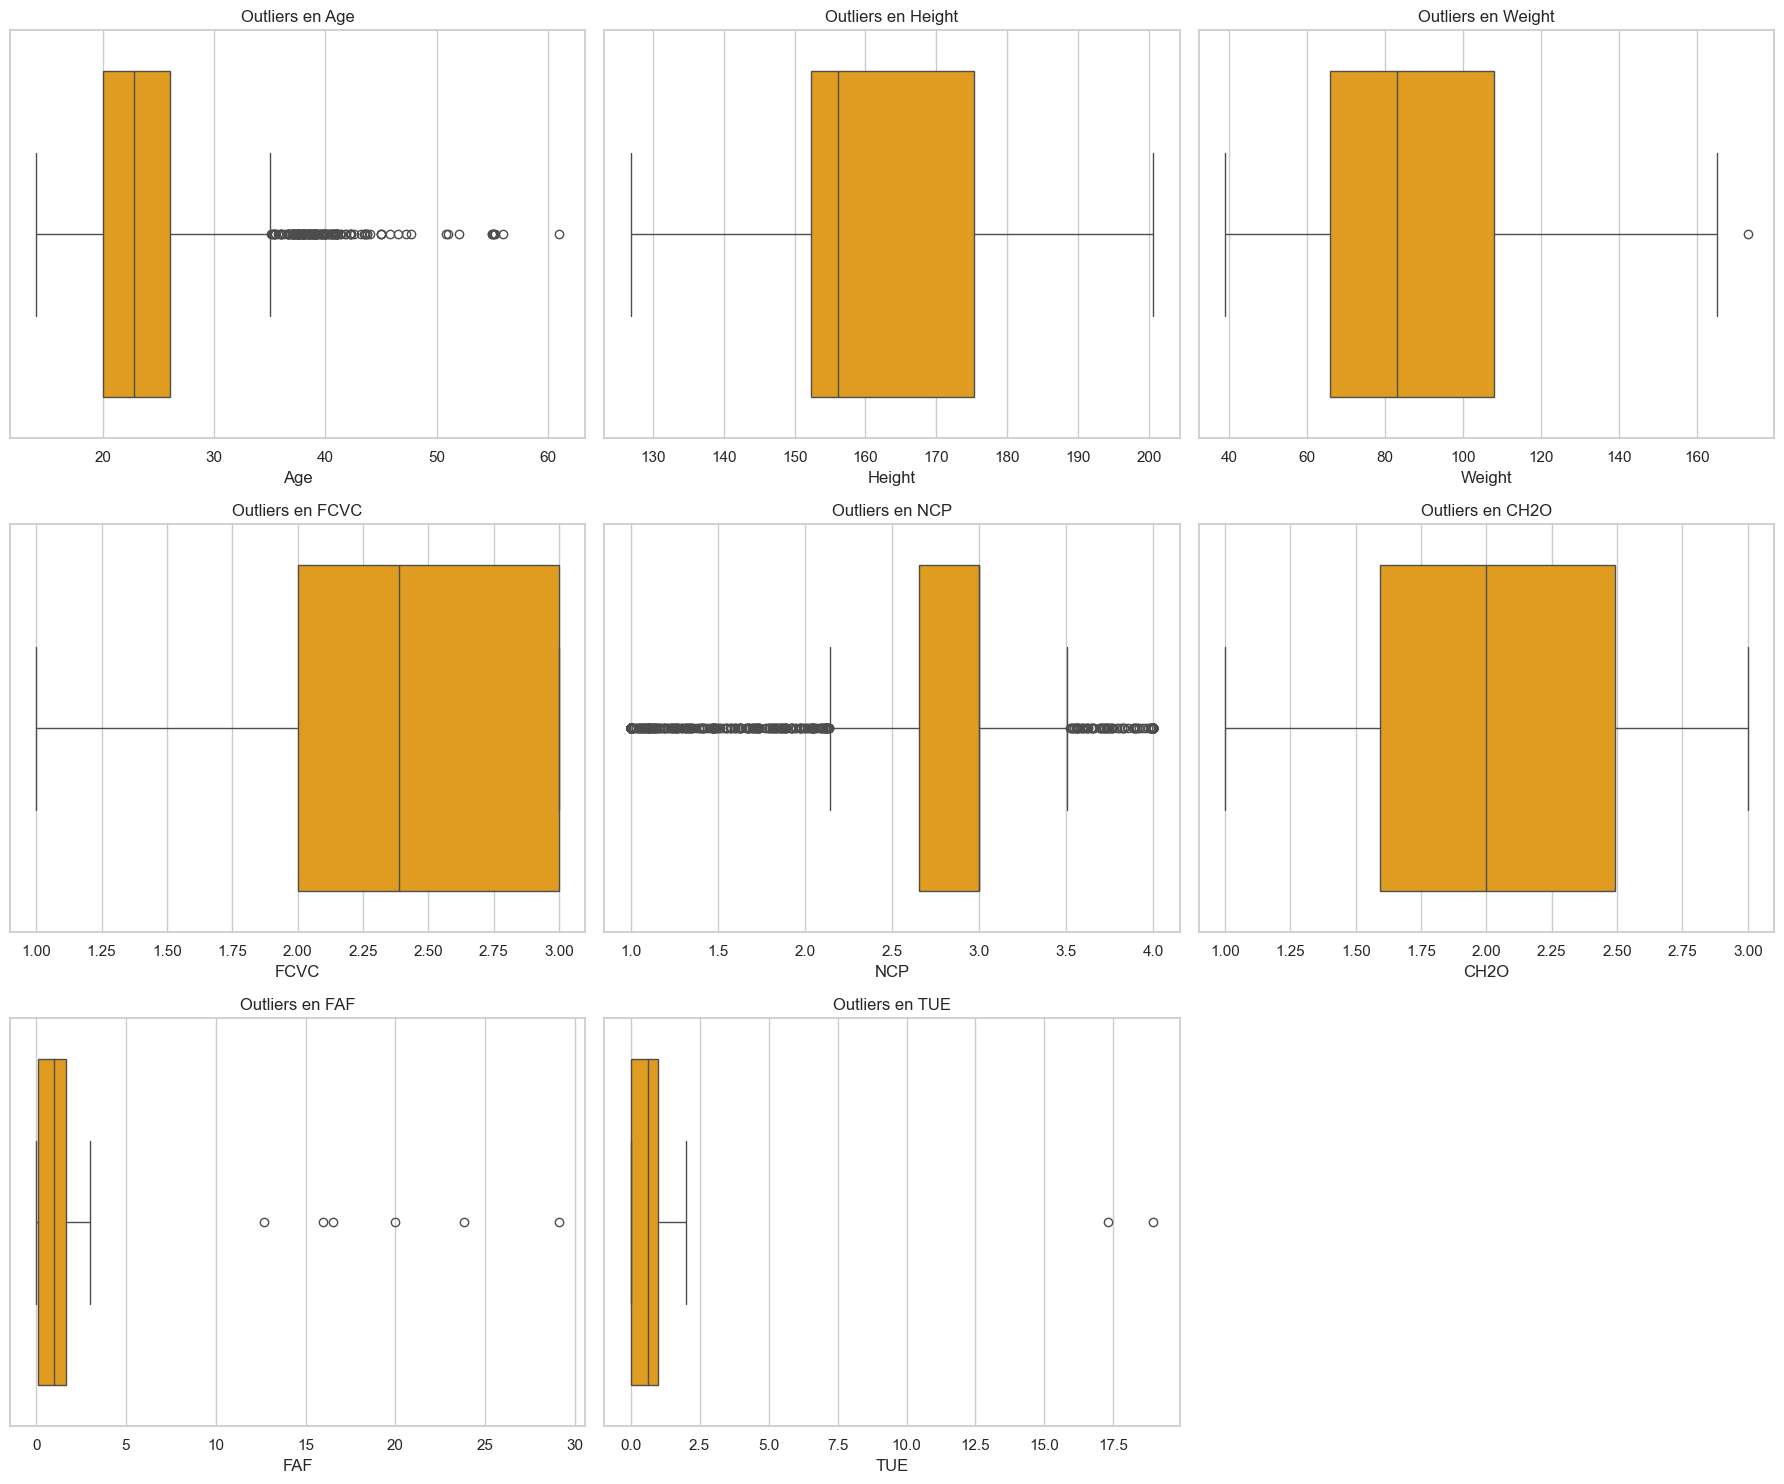

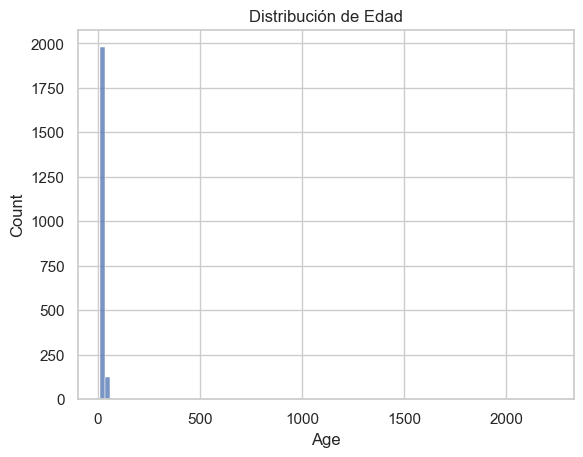

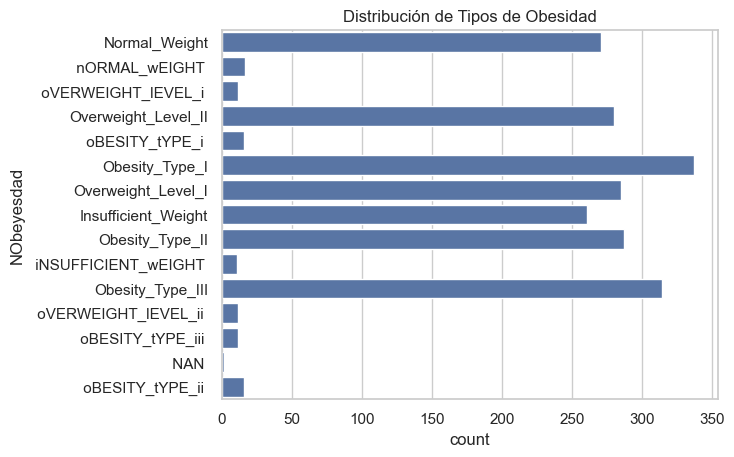

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('../data/raw/obesity_estimation_modified.csv', dtype = None)

# Vistazo inicial
print(df.head())
print(df.info())
print(df.describe())

# Revisar valores nulos
print(df.isnull().sum())

#VISUALIZACION variables Categoricas
#distribución por variable categórica
# Configurar la figura
categorical_cols =['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']

num_plots = len(categorical_cols)
cols = 3  # Número de columnas por fila
rows = (num_plots + cols - 1) // cols  # Calcular filas necesarias

fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()  # Aplanar para facilitar el acceso

# Crear los gráficos
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, palette="Set2", ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', labelrotation=45, labelsize=9)  # Rotar y reducir tamaño de fuente
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frecuencia', fontsize=10)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#VISUALIZACION Variable Numerica
#distribución por variable Numericas

numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Convertir columnas numéricas a tipo numérico, forzando errores a NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir columnas numéricas a tipo numérico, forzando errores a NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Definir límites razonables para cada variable
ranges = {
    'Age': (14, 100),
    'Height': (100, 220),
    'Weight': (30, 200),
    'FCVC': (1, 5),
    'NCP': (1, 5),
    'CH2O': (1, 5),
    'FAF': (0, 30),
    'TUE': (0, 25)
}

num_plots = len(numeric_cols)
cols = 3
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    low, high = ranges.get(col, (df[col].min(), df[col].max()))
    data = df[(df[col] >= low) & (df[col] <= high)][col].dropna()
    
    if len(data) == 0:
        print(f"No hay datos válidos para {col} en el rango {low}-{high}")
        continue
    
    bin_width = (data.max() - data.min()) / 20
    if bin_width == 0:  # En caso de que todos los datos sean iguales
        bins = 10
    else:
        bins = np.arange(data.min(), data.max() + bin_width, bin_width)
    
    sns.histplot(data, kde=True, bins=bins, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(6))  # Máximo 6 ticks en eje X
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#VISUALIZACION
#Boxplots para detección visual de outliers
# Definir límites razonables para cada variable (igual que antes)
ranges = {
    'Age': (14, 100),
    'Height': (100, 220),
    'Weight': (30, 200),
    'FCVC': (1, 5),
    'NCP': (1, 5),
    'CH2O': (1, 5),
    'FAF': (0, 30),
    'TUE': (0, 25)
}

num_plots = len(numeric_cols)
cols = 3
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    low, high = ranges.get(col, (df[col].min(), df[col].max()))
    data = df[(df[col] >= low) & (df[col] <= high)][col].dropna()
    
    sns.boxplot(x=data, color='orange', ax=axes[i])
    axes[i].set_title(f'Outliers en {col}')
    axes[i].set_xlabel(col)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Visualizaciones
# Histograma de Edad
sns.histplot(df['Age'])
plt.title('Distribución de Edad')
plt.show()

# Conteo de la variable objetivo 'NObeyesdad'
sns.countplot(y='NObeyesdad', data=df)
plt.title('Distribución de Tipos de Obesidad')
plt.show()

### Data Preparation

First let's see how our data behaves. Dataset contains both numerical and categorical data. 

In [381]:
# Se tiene que hacer limpieza y homogenizar los DATOS NUMERICOS
#Primero los numericos colocarlo en un formato para analizarlo

# Convertir strings a float (forzadamente), los valores no convertibles serán NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df[numeric_cols].isnull().sum())

Age       34
Height    42
Weight    26
FCVC      29
NCP       34
CH2O      32
FAF       31
TUE       39
dtype: int64


In [382]:
#Rellenar los NAN con la mediana:

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2135 non-null   object 
 1   Age                             2153 non-null   float64
 2   Height                          2153 non-null   float64
 3   Weight                          2153 non-null   float64
 4   family_history_with_overweight  2133 non-null   object 
 5   FAVC                            2137 non-null   object 
 6   FCVC                            2153 non-null   float64
 7   NCP                             2153 non-null   float64
 8   CAEC                            2131 non-null   object 
 9   SMOKE                           2134 non-null   object 
 10  CH2O                            2153 non-null   float64
 11  SCC                             2138 non-null   object 
 12  FAF                             21

As we can see, most of the *nan* values represent less than 2% of the data. So it is safe to removed them.

In [384]:
df = df.dropna(how='any', axis = 0)
df.isna().sum()/len(df) *100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
mixed_type_col                    0.0
dtype: float64

Let's transform these variables into their correct type.

In [385]:
# Definir el tipo correcto para cada columna
column_types = {
    # Numéricas continuas (float)
    'Height': float,
    'Weight': float,
    'FCVC': float,
    'CH2O': float,
    'FAF': float,
    'TUE': float,
    
    # Numéricas enteras (int)
    'Age': int,
    'NCP': int,
    
    # Categóricas (string)
    'Gender': str,
    'family_history_with_overweight': str,
    'FAVC': str,
    'CAEC': str,
    'SMOKE': str,
    'SCC': str,
    'CALC': str,
    'MTRANS': str,
    'NObeyesdad': str
}

# Aplicar conversiones con manejo de errores
for col, dtype in column_types.items():
    try:
        if dtype in [int, float]:
            # Para numéricos: primero a float, luego a int si aplica
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if dtype == int:
                # Eliminar NaN antes de convertir a int
                df[col] = df[col].dropna().astype(int)
        else:
            # Para categóricos: asegurar que sea string
            df[col] = df[col].astype(str)
    except Exception as e:
        print(f"Error convirtiendo {col}: {e}")

In [386]:
df.describe(exclude= 'number')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,mixed_type_col
count,1753,1753,1753,1753,1753,1753,1753,1753,1753,1753
unique,4,5,4,8,5,4,8,9,15,751
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I,unknown
freq,850,1355,1495,1382,1640,1583,1101,1239,280,211


We noticed there are several unique values in this categorical values because of typing mistakes. So we will lowercase everything and remove blank spaces within values.

In [387]:
df = df.apply(lambda col: col.str.lower() if col.dtype == "object" else col)
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

We have a peculiar case where some values are literally 'nan' as a string. So we will remove them as well.

In [388]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('nan', case=False, na=False)).any(axis=1)]

__mixed_type_col__ does not really adds relevant information to the dataset. Since it is a combination of meaningless discrete and categorical values, we proceed to remove.

In [389]:
df = df.drop('mixed_type_col', axis=1 )

Now we have the cleaning section ready. Let's take a look before we move on.

In [390]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,female,21,1.62,64.0,yes,no,2.0,3,sometimes,no,2.0,no,0.0,1.0,no,public_transportation,normal_weight
2,male,23,1.80,77.0,yes,no,2.0,3,sometimes,no,2.0,no,2.0,1.0,frequently,public_transportation,normal_weight
3,male,27,1.80,87.0,no,no,3.0,3,sometimes,no,2.0,no,2.0,0.0,frequently,walking,overweight_level_i
4,male,22,1.78,89.8,no,no,2.0,1,sometimes,no,2.0,no,0.0,0.0,sometimes,public_transportation,overweight_level_ii
5,male,29,1.62,53.0,no,yes,2.0,3,sometimes,no,2.0,no,0.0,0.0,sometimes,automobile,normal_weight


In [391]:
df.to_csv(r"..\data\raw\obesity_estimation_original.csv", index=False)

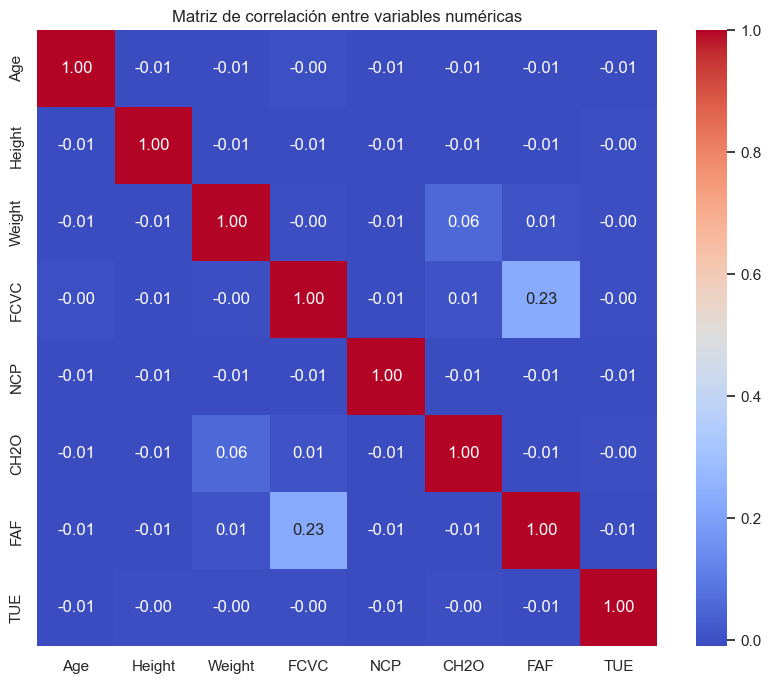

In [392]:
#Correlación entre variables numéricas
plt.figure(figsize=(10,8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

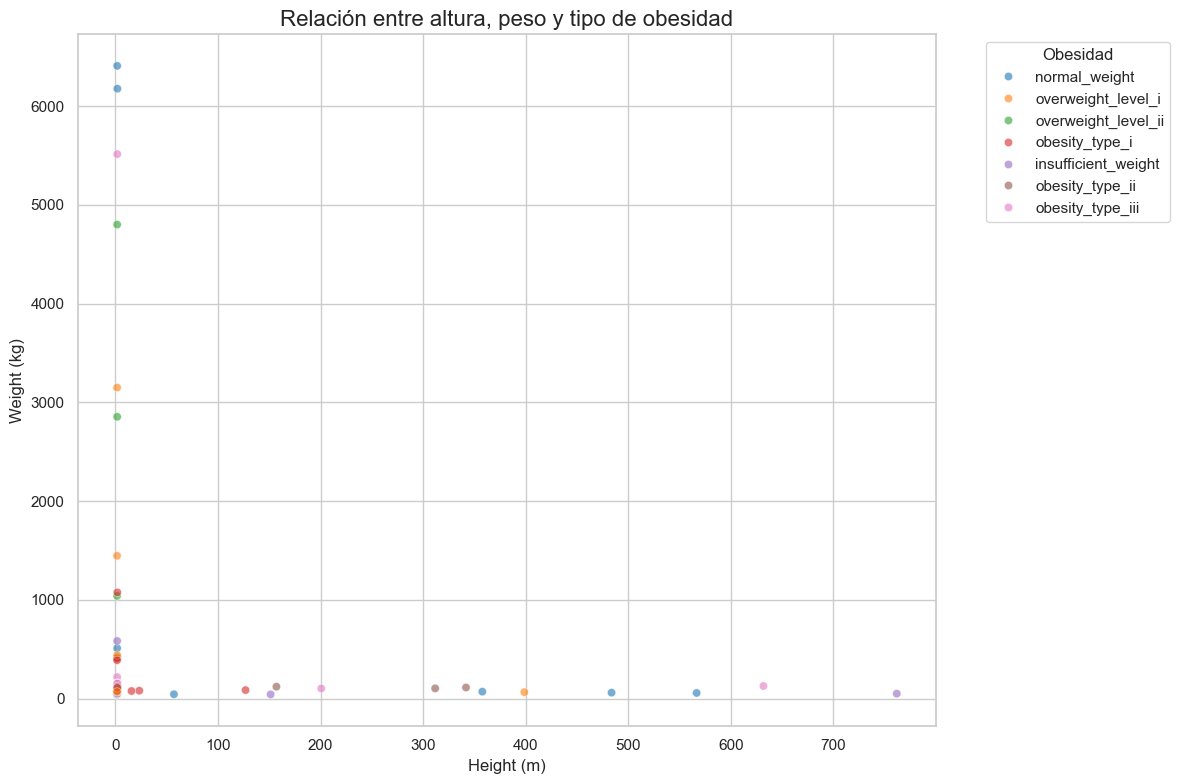

In [393]:
#Relación entre peso, altura y obesidad
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Height", y="Weight", hue="NObeyesdad", palette="tab10", alpha=0.6)
plt.title("Relación entre altura, peso y tipo de obesidad", fontsize=16)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.legend(title="Obesidad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

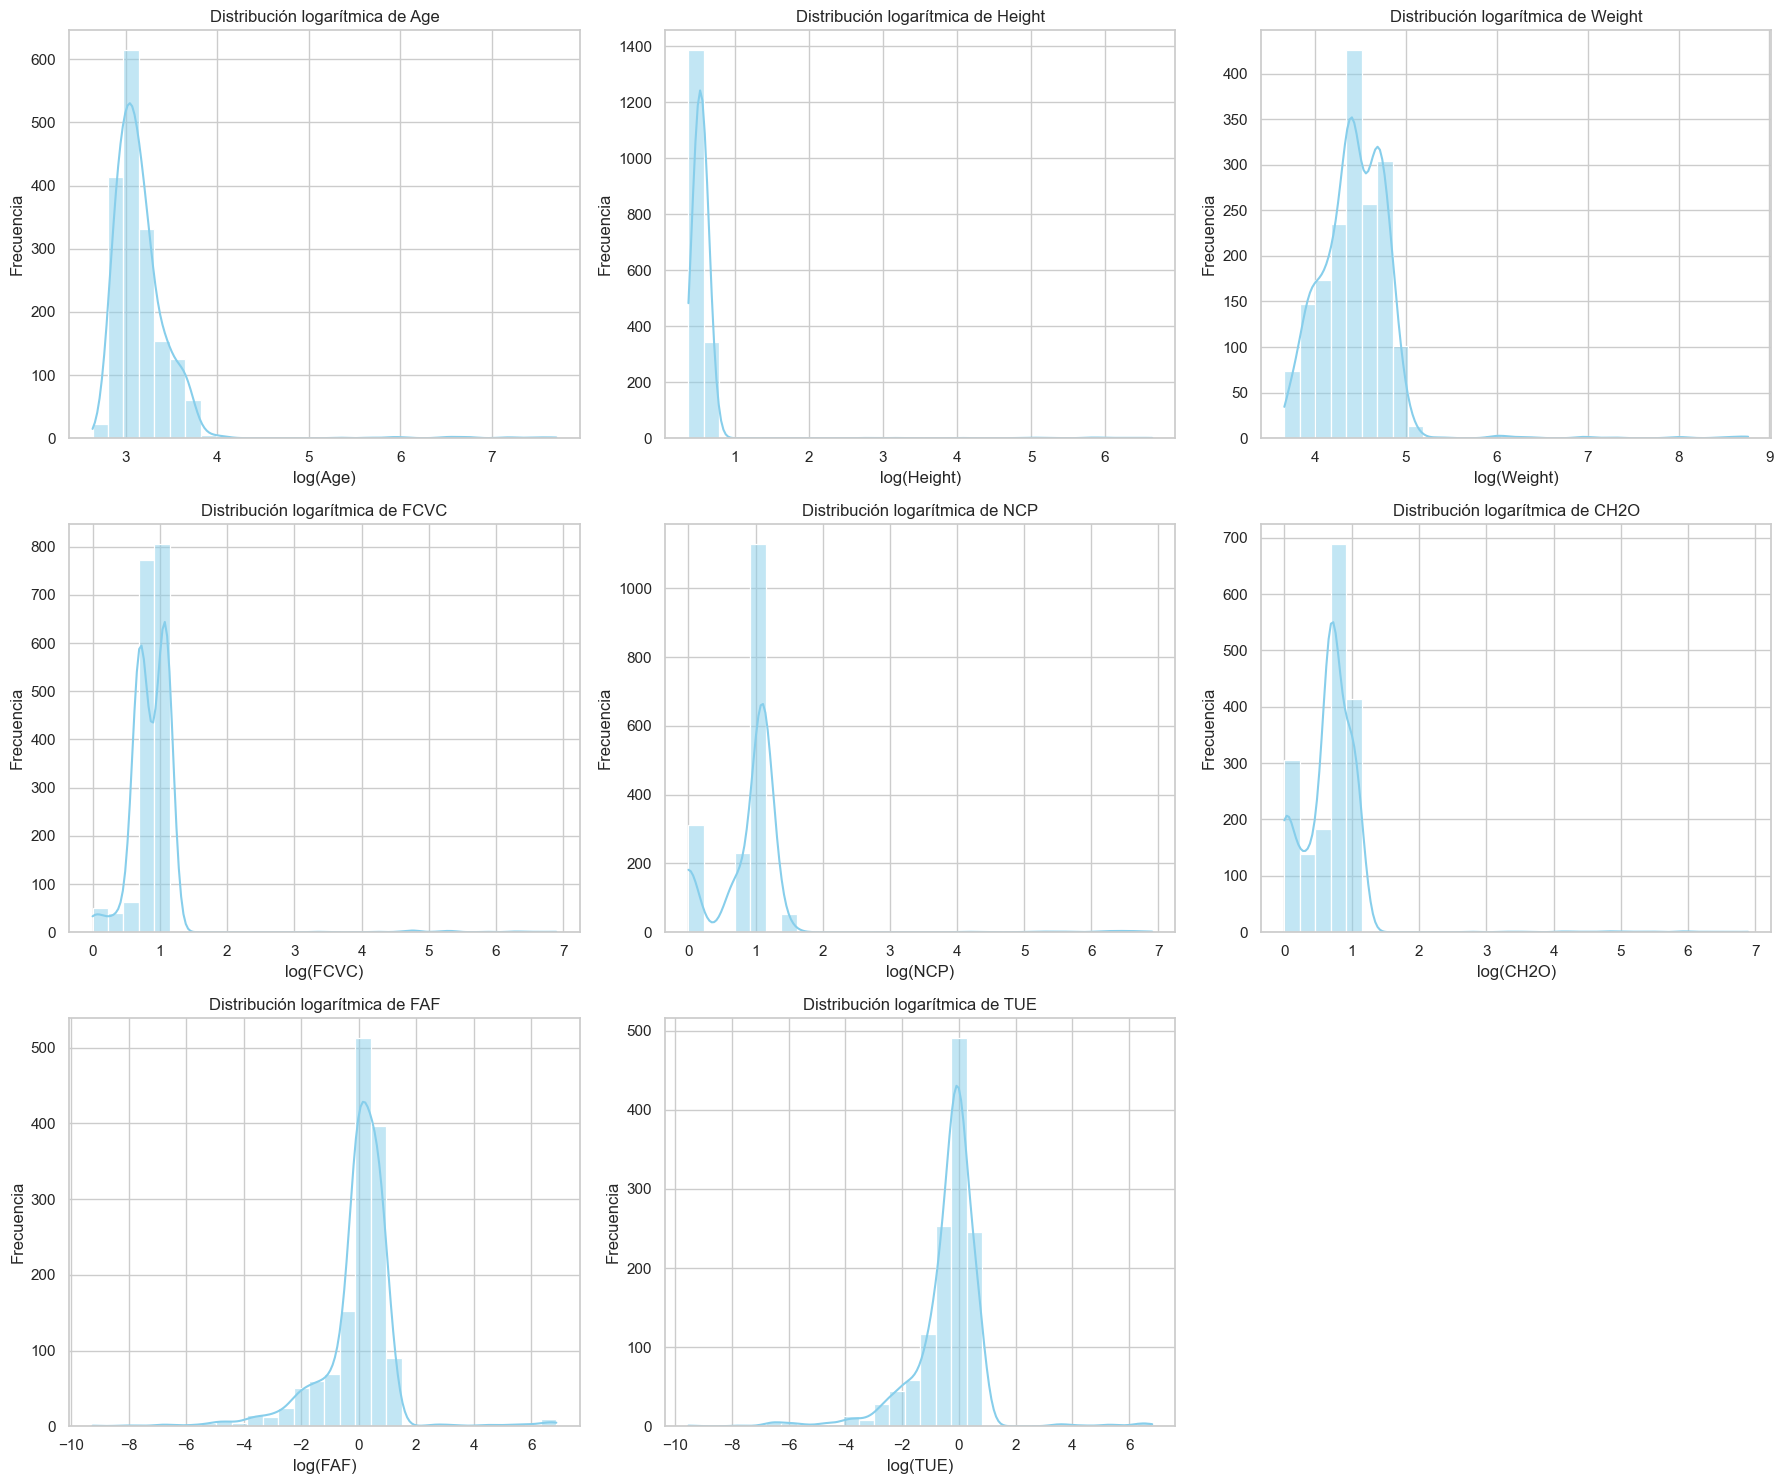

In [394]:
# Estilo bonito
sns.set(style="whitegrid")

num_plots = len(numeric_cols)
cols = 3
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    data = df[col][df[col] > 0].dropna()  # solo valores positivos para log

    sns.histplot(np.log(data), kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribución logarítmica de {col}')
    axes[i].set_xlabel(f"log({col})")
    axes[i].set_ylabel('Frecuencia')

# Quitar ejes vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [395]:
# Se tiene que hacer limpieza y homogenizar los DATOS categoricos
#Primero los numericos colocarlo en un formato para analizarlo
# Convertir todos los valores a minúsculas y quitar espacios
for col in categorical_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()

In [396]:
# Reemplazar texto 'nan' con valor NaN real
for col in categorical_cols:
    df[col] = df[col].replace('nan', np.nan)

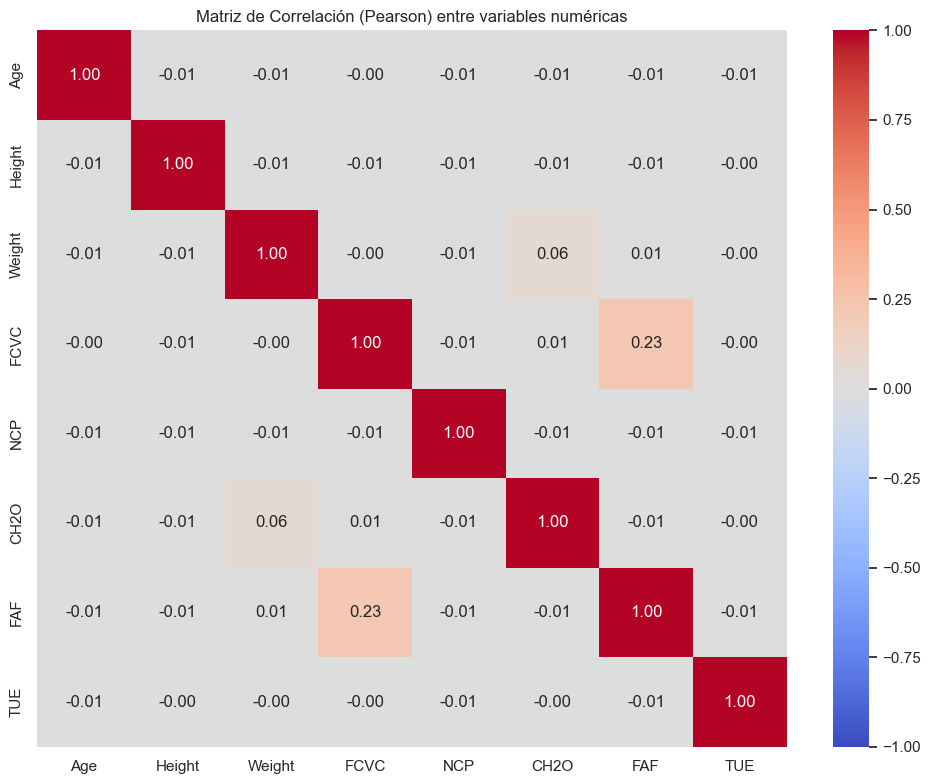

In [397]:
# Correlación de Pearson
corr_matrix = df[numeric_cols].corr(method='pearson')


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Matriz de Correlación (Pearson) entre variables numéricas')
plt.tight_layout()
plt.show()

/var/folders/ly/v01w3m6954z09lghvcgjlfp80000gn/T/ipykernel_20117/2885000287.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2", ax=axes[i])
/var/folders/ly/v01w3m6954z09lghvcgjlfp80000gn/T/ipykernel_20117/2885000287.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2", ax=axes[i])
/var/folders/ly/v01w3m6954z09lghvcgjlfp80000gn/T/ipykernel_20117/2885000287.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.coun

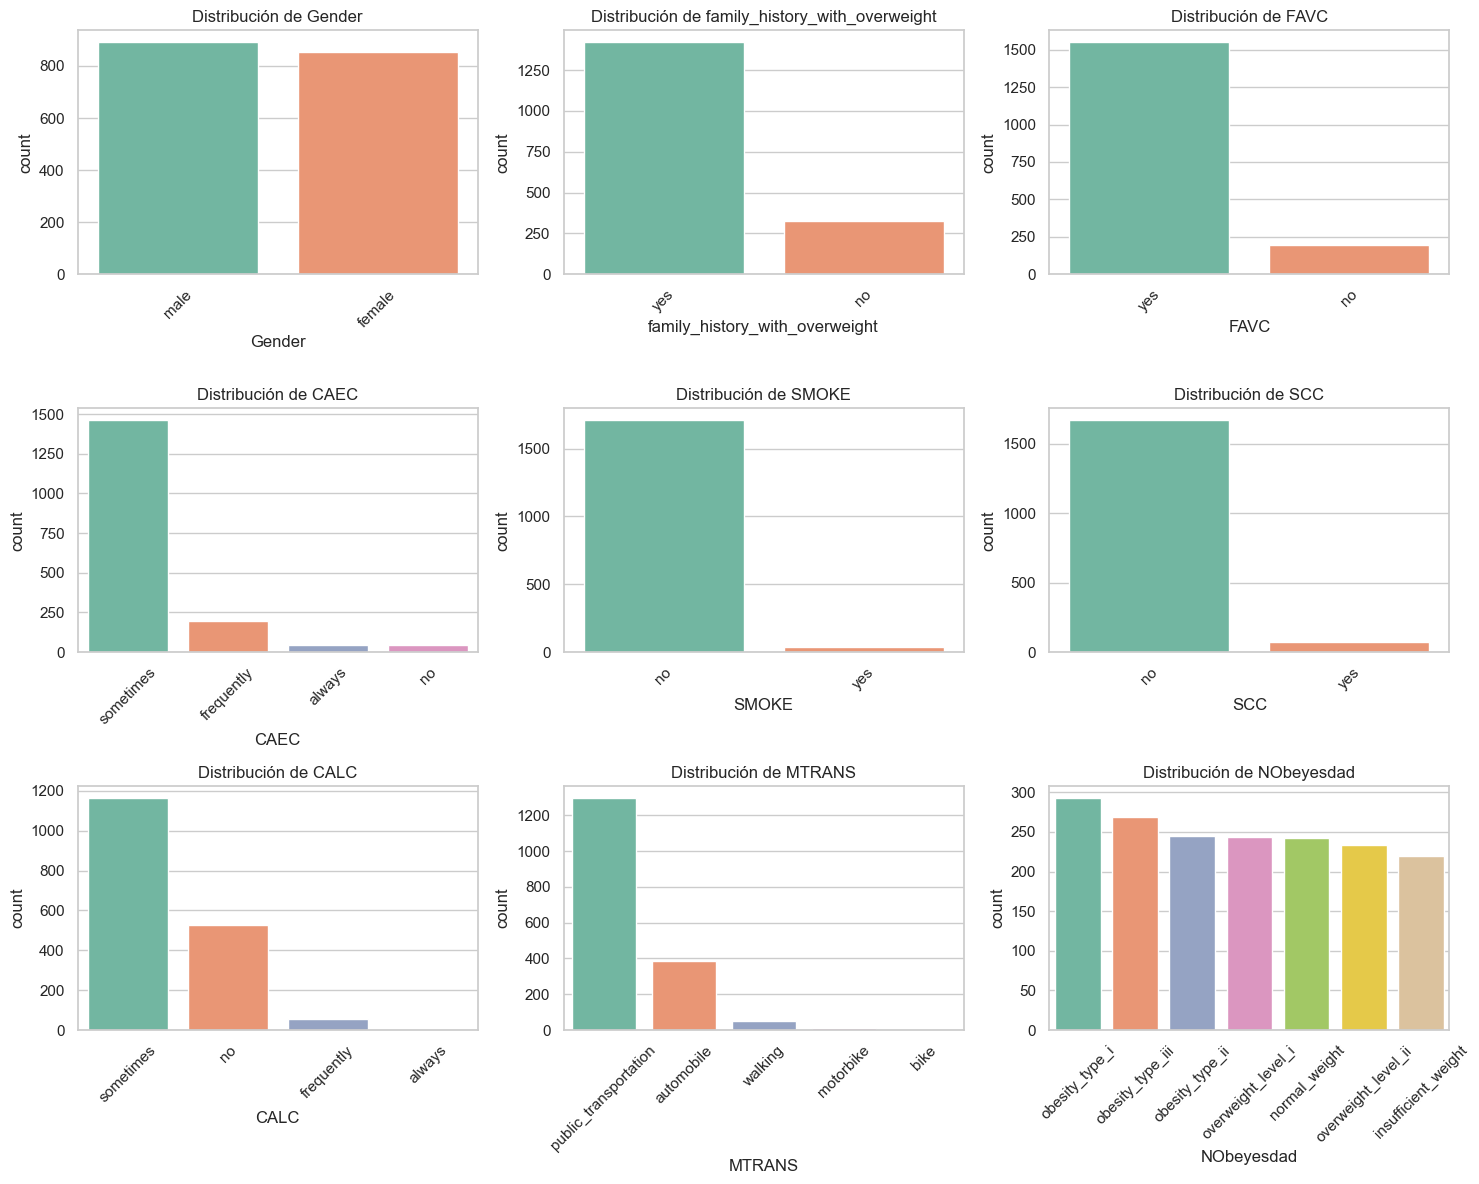

In [398]:
#Graficar distribución de cada variable categórica
# Número de columnas en el grid
cols = 3

# Calcular número de filas necesarias
rows = (len(categorical_cols) + cols - 1) // cols

# Crear la figura con subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()  # Para indexarlos fácilmente

# Graficar cada variable categórica
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2", ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [399]:
#Identificación de outliers en variables numéricas
## Identificación de outliers por IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

    print(f"📌 Columna: {col}")
    print(f" - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f" - Outliers detectados: {outliers.shape[0]}\n")

📌 Columna: Age
 - Q1: 20.00, Q3: 26.00, IQR: 6.00
 - Outliers detectados: 150

📌 Columna: Height
 - Q1: 1.63, Q3: 1.77, IQR: 0.14
 - Outliers detectados: 16

📌 Columna: Weight
 - Q1: 66.53, Q3: 108.09, IQR: 41.56
 - Outliers detectados: 17

📌 Columna: FCVC
 - Q1: 2.00, Q3: 3.00, IQR: 1.00
 - Outliers detectados: 16

📌 Columna: NCP
 - Q1: 2.00, Q3: 3.00, IQR: 1.00
 - Outliers detectados: 21

📌 Columna: CH2O
 - Q1: 1.56, Q3: 2.49, IQR: 0.94
 - Outliers detectados: 16

📌 Columna: FAF
 - Q1: 0.17, Q3: 1.70, IQR: 1.53
 - Outliers detectados: 22

📌 Columna: TUE
 - Q1: 0.00, Q3: 1.00, IQR: 1.00
 - Outliers detectados: 14



In [400]:
#crear una nueva variable derivada llamada IMC (Índice de Masa Corporal) usando los datos de peso (Weight)
#y altura (Height) del dataset.
# Crear variable IMC
df['IMC'] = df['Weight'] / (df['Height'] ** 2)

# Mostrar primeras filas para verificar
df[['Weight', 'Height', 'IMC']].head()

,Weight,Height,IMC
0,64.0,1.62,24.386526
2,77.0,1.80,23.765432
3,87.0,1.80,26.851852
4,89.8,1.78,28.342381
5,53.0,1.62,20.195092


In [401]:
#Código en Python para crear la columna IMC_category:
def clasificar_imc(imc):
    if pd.isnull(imc):
        return 'Desconocido'
    elif imc < 18.5:
        return 'Bajo peso'
    elif imc < 25:
        return 'Normal'
    elif imc < 30:
        return 'Sobrepeso'
    elif imc < 35:
        return 'Obesidad I'
    elif imc < 40:
        return 'Obesidad II'
    else:
        return 'Obesidad III'

# Crear la nueva columna categórica
df['IMC_category'] = df['IMC'].apply(clasificar_imc)

# Verificar algunas filas
df[['IMC', 'IMC_category']].head()

,IMC,IMC_category
0,24.386526,Normal
2,23.765432,Normal
3,26.851852,Sobrepeso
4,28.342381,Sobrepeso
5,20.195092,Normal


In [402]:
#Eje X Las categorías del IMC (los grupos creados con la función clasificar_imc) como: "Normal", "Sobrepeso", etc.

#Eje Y El conteo de personas (observaciones) en cada categoría del eje X.

/var/folders/ly/v01w3m6954z09lghvcgjlfp80000gn/T/ipykernel_20117/2331915868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='IMC_category', order=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad I', 'Obesidad II', 'Obesidad III'], palette="Set2")


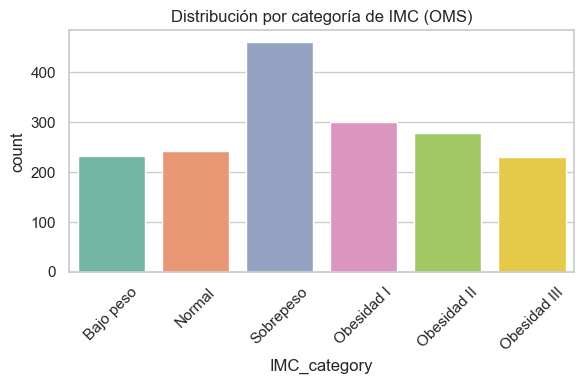

In [403]:
#Visualización

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='IMC_category', order=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad I', 'Obesidad II', 'Obesidad III'], palette="Set2")
plt.title("Distribución por categoría de IMC (OMS)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/ly/v01w3m6954z09lghvcgjlfp80000gn/T/ipykernel_20117/1804957206.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2", ax=axes[i])
/var/folders/ly/v01w3m6954z09lghvcgjlfp80000gn/T/ipykernel_20117/1804957206.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2", ax=axes[i])
/var/folders/ly/v01w3m6954z09lghvcgjlfp80000gn/T/ipykernel_20117/1804957206.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.coun

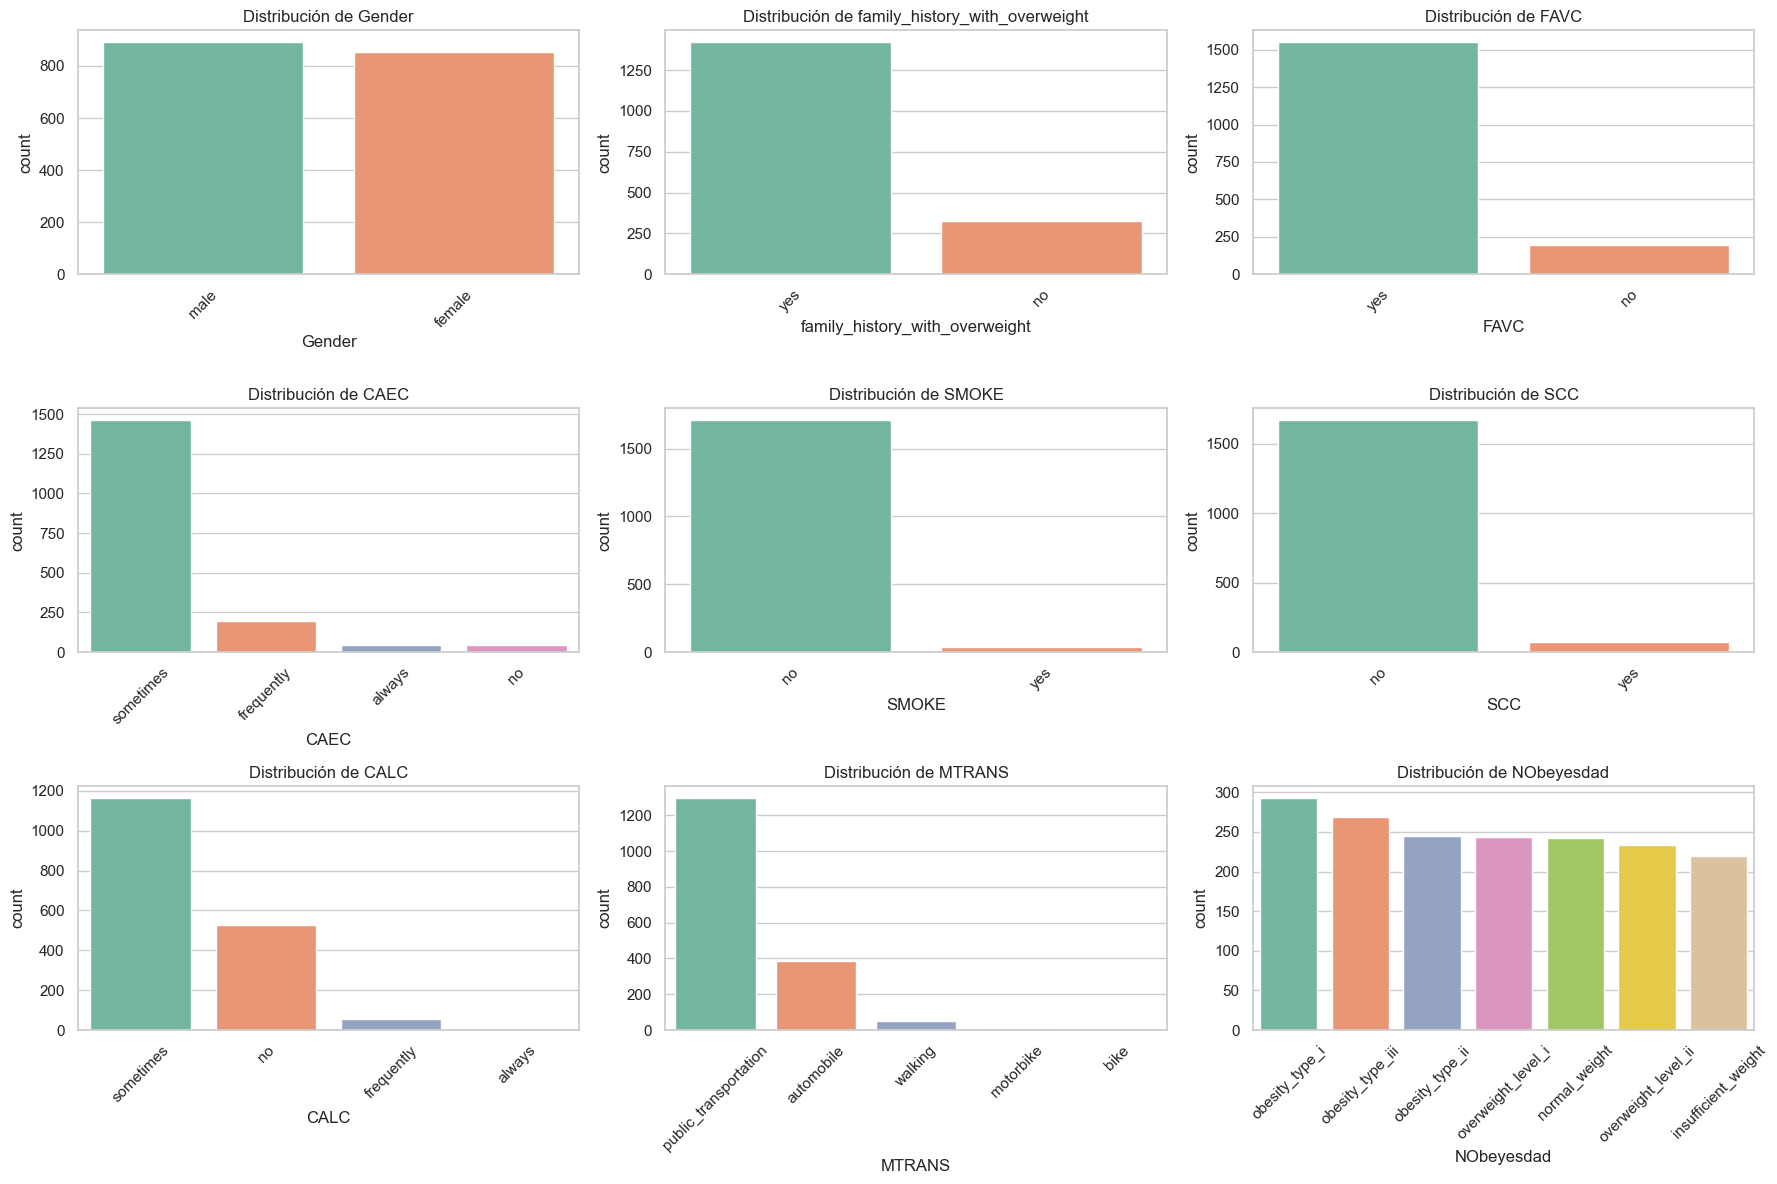

In [404]:
#Identificación de outliers en variables categóricas
cols_per_row = 3
num_plots = len(categorical_cols)
rows = (num_plots + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="Set2", ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [405]:
#crear una nueva variable derivada llamada IMC (Índice de Masa Corporal) usando los datos de peso (Weight)
#y altura (Height) del dataset.
# Crear variable IMC
df['IMC'] = df['Weight'] / (df['Height'] ** 2)

# Mostrar primeras filas para verificar
df[['Weight', 'Height', 'IMC']].head()

,Weight,Height,IMC
0,64.0,1.62,24.386526
2,77.0,1.80,23.765432
3,87.0,1.80,26.851852
4,89.8,1.78,28.342381
5,53.0,1.62,20.195092
